[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                              text  compound sentiment
0    I love this product! It works amazingly well.    0.7836  Positive
1      This is the worst experience I've ever had.   -0.6249  Negative
2                    Not bad, but could be better.    0.6980  Positive
3  Absolutely fantastic service, highly recommend!    0.7893  Positive
4     I'm so disappointed, it broke after one use.   -0.7548  Negative
5         Pretty good, I'm happy with my purchase.    0.8689  Positive
6                  Terrible! Will never buy again.   -0.5255  Negative
7                Okay experience, nothing special.   -0.0920  Negative
8                            Best purchase ever!!!    0.7249  Positive
9                       I hate it, waste of money.   -0.7579  Negative


<ipython-input-1-1a90a40e532c>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


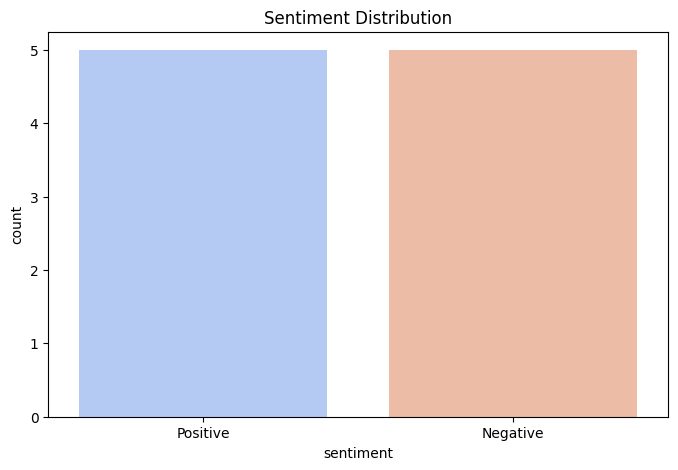

In [1]:
# Install required libraries
!pip install pandas nltk matplotlib seaborn --quiet

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK VADER lexicon (for sentiment analysis)
nltk.download('vader_lexicon')

# Sample data: Let's create a small dataset of tweets/reviews
data = {
    "text": [
        "I love this product! It works amazingly well.",
        "This is the worst experience I've ever had.",
        "Not bad, but could be better.",
        "Absolutely fantastic service, highly recommend!",
        "I'm so disappointed, it broke after one use.",
        "Pretty good, I'm happy with my purchase.",
        "Terrible! Will never buy again.",
        "Okay experience, nothing special.",
        "Best purchase ever!!!",
        "I hate it, waste of money."
    ]
}

df = pd.DataFrame(data)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each text
df['sentiment_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x))
df['compound'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Define sentiment category based on compound score
def categorize_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['compound'].apply(categorize_sentiment)

# Show dataframe with sentiments
print(df[['text', 'compound', 'sentiment']])

# Visualization: Sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()
